In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

In [128]:
num_samples = 10000
a_values = [0, 2, 4]
sigma_values = [1, 2, 3]
num_bins = 30
alpha = 0.05

In [129]:
def generate_x(sigma, a):
    mu = np.array([np.sum(np.random.rand(12) - 6) for _ in range(num_samples)])
    return sigma * mu + a

In [130]:
def chi_squared_test(random_numbers, num_bins, alpha):
    # Обчислюємо спостережувані частоти
    observed_frequencies, bin_edges = np.histogram(random_numbers, bins=num_bins, density=True)

    # Обчислюємо середини інтервалів
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Обчислюємо очікувані частоти за допомогою нормального розподілу
    expected_frequencies = norm.pdf(bin_centers, loc=np.mean(random_numbers), scale=np.std(random_numbers))
    
    # Обчислюємо статистику хі-квадрат
    chi_squared_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
    
    # Визначаємо ступені свободи
    degrees_of_freedom = num_bins - 1

    # Обчислюємо критичне значення хі-квадрат
    chi_squared_critical = chi2.ppf(1 - alpha, degrees_of_freedom)
    
    return chi_squared_statistic, chi_squared_critical


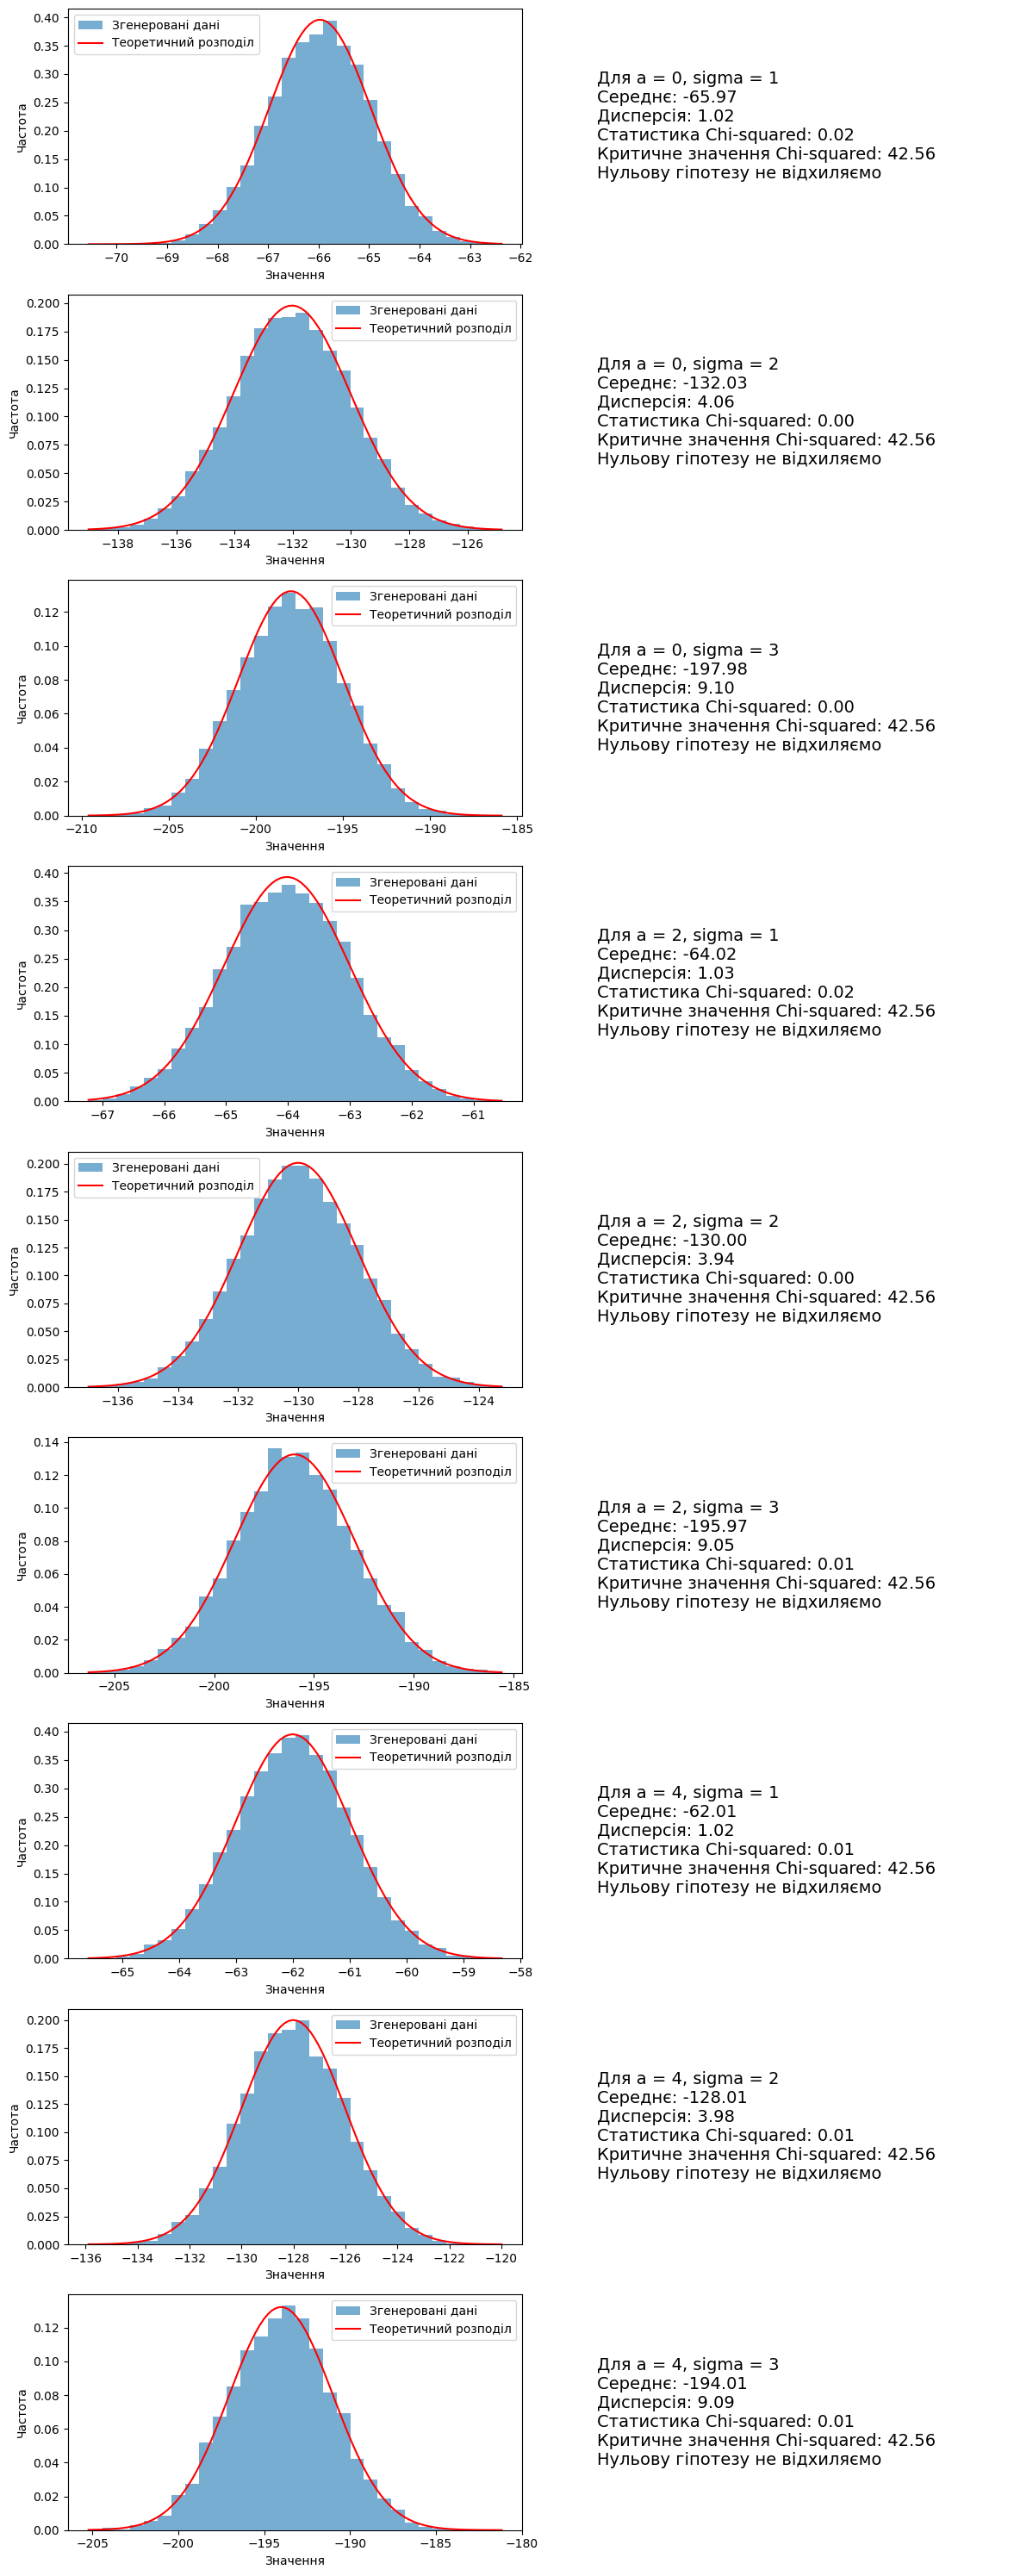

In [131]:
fig, axs = plt.subplots(len(a_values) * len(sigma_values), 2, figsize=(12, 30))

for i, a in enumerate(a_values):
    for j, sigma in enumerate(sigma_values):
        # Генерація вибірки за формулою 
        mu = np.array([np.sum(np.random.rand(12) - 6) for _ in range(num_samples)])
        x_values = sigma * mu + a

        # Обчислення середнього і дисперсії
        mean = np.mean(x_values)
        variance = np.var(x_values)
        
        # Теоретичний розподіл
        x_range = np.linspace(min(x_values), max(x_values), 100)
        normal_pdf = norm.pdf(x_range, loc=mean, scale=np.sqrt(variance))
        
        # Побудова гістограми та теоретичного розподілу
        axs[i * len(sigma_values) + j, 0].hist(x_values, bins=num_bins, density=True, alpha=0.6, label=f'Згенеровані дані')
        axs[i * len(sigma_values) + j, 0].plot(x_range, normal_pdf, 'r-', label='Теоретичний розподіл')
        
        # Обчислення статистики хі-квадрат і вивід результатів
        chi_squared_statistic, chi_squared_critical = chi_squared_test(x_values, num_bins, alpha)
        
        text = (f'Для a = {a}, sigma = {sigma}\n'
                f'Середнє: {mean:.2f}\n'
                f'Дисперсія: {variance:.2f}\n'
                f'Статистика Chi-squared: {chi_squared_statistic:.2f}\n'
                f'Критичне значення Chi-squared: {chi_squared_critical:.2f}\n')

        if chi_squared_statistic <= chi_squared_critical:
            text += 'Нульову гіпотезу не відхиляємо'
        else:
            text += 'Нульову гіпотезу відхиляємо'
        
        axs[i * len(sigma_values) + j, 1].axis('off')
        axs[i * len(sigma_values) + j, 1].text(0.1, 0.5, text, fontsize=14, verticalalignment='center')
        axs[i * len(sigma_values) + j, 0].legend()
        axs[i * len(sigma_values) + j, 0].set_xlabel('Значення')
        axs[i * len(sigma_values) + j, 0].set_ylabel('Частота')

plt.tight_layout()
plt.show()